# **Capstone project: Providing data-driven suggestions for HR**

### Entendiendo el escenario y el problema / Understand the business scenario and problem

El departamento de recursos humanos de Salifort Motor quiere tomar algunas iniciativas para mejorar los niveles de satisfacción de los empleados. Han recogido datos de los empleados y ahora quieren utilizarlos para resolver la siguiente pregunta: ¿qué puede hacer que el empleado abandone la empresa?

El objetivo es analizar los datos recolectados por el departamento de recursos humanos y construir un modelo que prediga si un empleado va a abandonar la compañía.

The human resources department at Salifort Motor wants to take some initiatives to improve employee satisfaction levels. They have collected employee data and now want to use it to solve the following question: what can make an employee leave the company?

The goal is to analyse the data collected by the HR department and build a model that predicts whether an employee will leave the company.

El dataset tiene las siguientes variables:

The dataset contains the following variables:

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

Source: [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,\
classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first ten rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Recopliar información básica de los datos / Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Recopilar estadísticas descriptivas de los datos / Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Renombrar columnas / Rename columns

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

Podemos observar algunos fallos de formato y de escritura en los nombres de las columnas. Procedemos a solucionarlos.

We can observe some formatting and misspelling errors in the column names. We proceed to fix them.

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'average_montly_hours':'average_monthly_hours',
                         'Work_accident':'work_accident',
                         'time_spend_company':'tenure',
                         'Department':'department'})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Comprobar valores omitidos / Checking missing values 

In [7]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

No hay valores omitidos.

There are no missing values.

### Comprobando duplicados / Checking duplicates

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


El output anterior nos muestra las primeras filas duplicadas. En este punto deberíamos preguntarnos ¿qué probabilidad hay de que dos empleados diferentes hayan dado las mismas respuestas para cada columna?

Se podría hacer un análisis probabilístico aplicando el teorema de Bayes para encontrar la probabilidad de que se repitan exactamente todos los datos en cada columna para dos filas distintas. En este caso, con varias posibilidades para cada una de las 10 columnas parece muy poco probable que las observaciones sean válidas. Procedemos a eliminarlas.

The output above shows us the first duplicate rows. At this point we should ask ourselves what is the probability that two different employees have given the same answers for each column?

A probabilistic analysis could be done by applying Bayes' theorem to find the probability of exactly repeating all the data in each column for two different rows. In this case, with several possibilities for each of the 10 columns it seems very unlikely that the observations are valid. We proceed to drop them.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = 'first')


# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Comprobando valores atípicos / Checking outliers

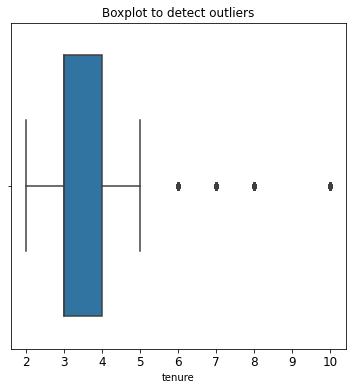

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize = (6,6))
plt.title('Boxplot to detect outliers', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(x = df1['tenure']);

El boxplot nos muestra que aparecen algunos valores atípicos en la variable `tenure`. Sería útil investigar cuántas filas contienen valores atípicos en la columna de `tenure`-

The boxplot shows some outliers in the `tenure` variable. It would be helpful to investigate how many rows contain outliers in the `tenure` column.

In [12]:
# Determine the number of rows containing outliers

#Compute the 25th and 75th percentile in tenure.
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)

#Compute the interquartile range in tenure
iqr = percentile75 - percentile25

#Define the upper and lower limit for non-outliers values
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print('Upper limit:', upper_limit)
print('Lower limit:', lower_limit)

#Identify outliers
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
print('Number of rows in the data containing outliers:', len(outliers))

Upper limit: 5.5
Lower limit: 1.5
Number of rows in the data containing outliers: 824


Vamos a empezar por entender cuántas personas se han ido frente al número de personas que continúan en la empresa.

Let's start by understanding how many people have left versus the number of people who remain.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print('')

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize = True))


0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Visualización de los datos / Data visualization

Ahora vamos a empezar a mostrar gráficas de ciertas variables frente a otras y compararlas dependiendo de si la persona ha abandonado la empresa o continúa en ella. 

Now we are going to start showing graphs of certain variables against others and compare them depending on whether the person has left or is still with the company. 

Podemos empezar creando un boxplot donde visualicemos el número de proyectos en los que ha participado el empleado frente al número de horas mensuales de media. También vamos a crear un histograma del número de proyectos en los que han participado.

We can start by creating a boxplot where we visualise the number of projects the employee has participated in versus the average number of hours per month. We will also create a histogram of the number of projects they have participated in.

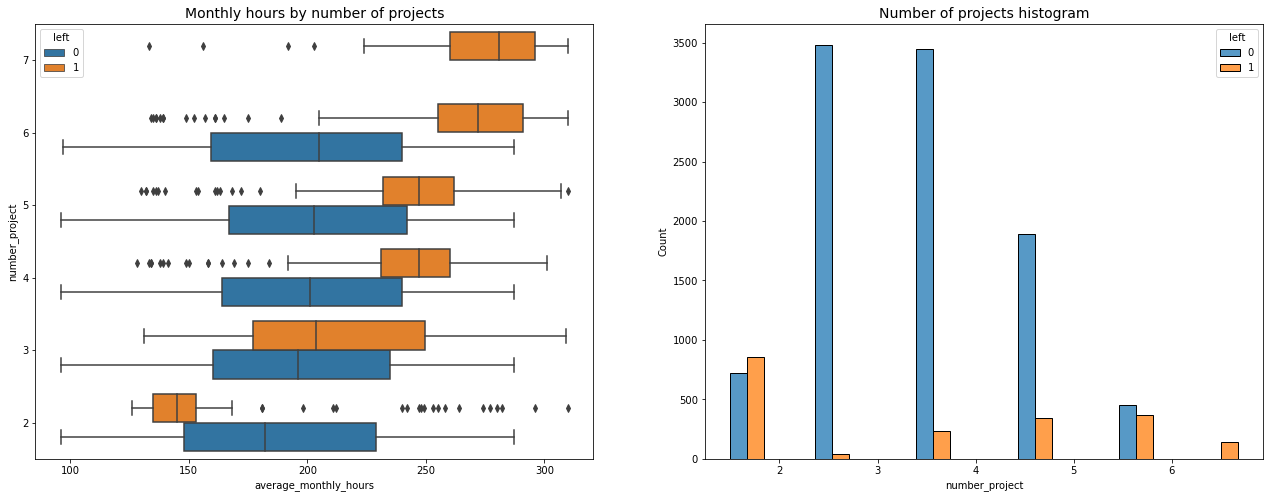

In [14]:
fig, ax = plt.subplots ( 1, 2, figsize = (22,8))

#Boxplot showing average_monthly_hours distributions for number_project.
sns.boxplot(data=df1, x = 'average_monthly_hours', y = 'number_project', hue = 'left', orient = 'h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize = 14)

#Histogram showing distribution of numner_project, comparing employees who stayed and thos who left
sns.histplot(data = df1, x = 'number_project', hue='left', multiple = 'dodge', shrink = 2, ax = ax[1])
ax[1].set_title('Number of projects histogram', fontsize = 14);

Puede ser normal que un mayor número de proyectos implique un mayor número de horas. Parece ser que este es el caso aquí, con la media de horas de cada grupo (stayed y left) creciendo conforme el número de proyectos crece. Sin embargo, hay algunas cosas que se pueden resaltar en estos gráficos:

1. Hay dos grupos de empleados que han dejado la compañía: (A) aquellos que han trabajado considerablemente menos que sus compañeros con el mismo número de proyectos, y (B) aquellos que han trabajado mucho más. En el grupo A es posible que fueran despedidos. También es posible que este grupo contenga aquellos empleados a los que se le asignaron menos horas porque ya estaban en la puerta de salida. Para los empleados del grupo (B), es razonable pensar que dejaron la empresa debido a la gran cantidad de trabajo que tenían.

2. Todos los empleados con 7 proyectos dejaron la empresa. Los empleados con 7 y 6 proyectos que dejaron la empresa tienen un interquartile entre 255-295 horas al mes. Mucho mayor que el resto de empleados.

3. El número óptimo de proyectos por empleado suele ser de entre 4 y 5 proyectos. 

4. Si asumimos una semana de 40 horas y dos semanas de vacaciones al año, la media del número de horas trabajadas al mes debería de ser de 166.67 horas. Esto significa que a partir de los trabajadores que trabajan en 2 proyectos, incluso los que no han abandonado la compañía, trabajan considerablemente más de los esperado.

It may be normal that a higher number of projects implies a higher number of hours. This seems to be the case here, with the average number of hours for each group (stayed and left) increasing as the number of projects increases. However, there are a few things that can be highlighted in these graphs:

1. There are two groups of employees who have left the company: (A) those who have worked considerably less than their peers with the same number of projects, and (B) those who have worked much more. In group A it is possible that they were laid off. It is also possible that this group contains those employees who were assigned fewer hours because they were already at the exit door. For the employees in group (B), it is reasonable to think that they left the company because of the large amount of work they had.

2. All employees with 7 projects left the company. Employees with 7 and 6 projects who left the company have an interquartile between 255-295 hours per month. Much higher than the rest of the employees.

3. The optimal number of projects per employee is usually between 4 and 5 projects. 

4. Assuming a 40-hour week and two weeks holiday per year, the average number of hours worked per month should be 166.67 hours. This means that from employees working on 2 projects, even those who have not left the company, work considerably more than expected.

El siguiente paso será confirmar que todos los empleados con más de siete proyectos han abandonado la empresa.

The next step will be check that all the employees who worked in 7 projects left.

In [15]:
df1[df1['number_project'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

Podemos confirmar que todos los trabajadores con 7 proyectos se fueron de la empresa.

We can confirm that all the employees with 7 projects left.

Ahora vamos a examinar las horas mensuales con los niveles de satisfacción.

Now we are going to examine the average monthly hours with the satisfaction levels.

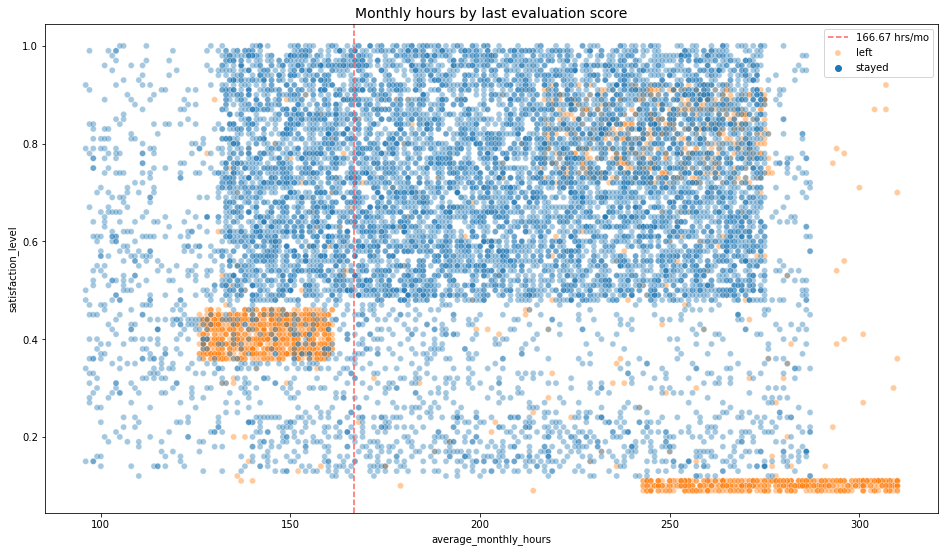

In [16]:
plt.figure(figsize = (16,9))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, color = '#ff6361', label = '166.67 hrs/mo', ls = '--')
plt.legend(labels = ['166.67 hrs/mo', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize = 14);

El scatterplot de arriba muestra que hay un gran grupo de empleados que trabajan entre 240 y 315 horas al mes. Esto está claramente relacionado con los niveles de satisfacción muy cerca de cero.

La gráfica también muestra otro grupo de empleados que han abandonado la empresa. Este grupo trabajaba por debajo de la media. Es difícil especular el porqué se fueron. Los niveles de satisfacción están alrededor de 0.4 por lo que podría ser que se sintiesen presionados para trabajar más y esta presión fuese lo que bajas el nivel de satisfacción en la empresa.

Por último hay un grupo de trabajadores que trabajaban entre 210 y 280 horas al mes cuyos niveles de satisfacción estaban entre 0.7 y 0.9 pero también abandonaron la empresa. 

The scatterplot above shows that there is a large group of employees working between 240 and 315 hours per month. This is clearly related to satisfaction levels very close to zero.

The scatterplot also shows another group of employees who have left the company. This group worked below average. It is difficult to speculate why they left. Satisfaction levels are around 0.4 so it could be that they felt pressured to work harder and this pressure was what lowered the level of satisfaction in the company.

Finally there is a group of workers who worked between 210 and 280 hours per month whose satisfaction levels were between 0.7 and 0.9 but also left the company. 

Ahora vamos a visualizar los niveles de satisfacción y la tenencia en la empresa.

Now we are going to visualice the satisfaction levels and the tenure.

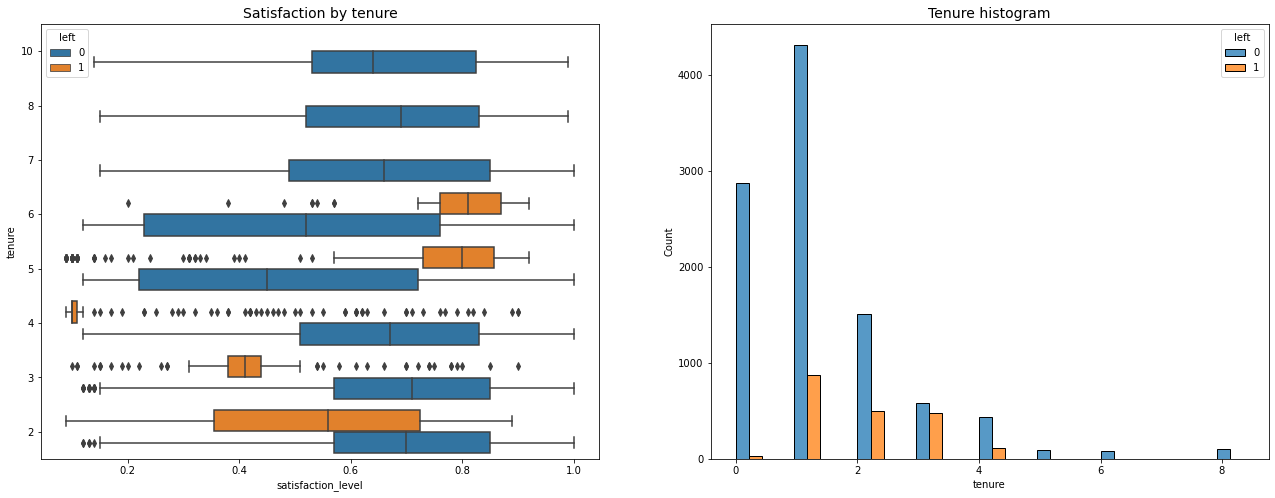

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data = df1, x = 'satisfaction_level', y = 'tenure', hue = 'left', orient = 'h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize = 14)

sns.histplot(data = df1, x = 'tenure', hue = 'left', multiple = 'dodge', shrink = 5, ax = ax[1])
ax[1].set_title('Tenure histogram', fontsize = 14);

Podemos resaltar las siguientes observaciones:

1. Los empleados que han abandonado se agrupan en dos grupos. Empleados insatisfechos con periodos cortos en la empresa y empleados con altos niveles de satisfacción y periodos de duración medios en la empresa (5 o 6 años).

2. Los empleados que se fueron habiendo trabajado 4 años en la empresa tienen un nivel de satisfacción bastante inusual. Sería útil comprobar si durante esos años se produjeron cambios en las políticas de la empresa que afectasen específicamente a los empleados con una duración de 4 años.

3. Los empleados que más años llevan no abandonan la empresa. Sus niveles de satisfacción coincidían con los de los nuevos empleados que se quedaron.

We can highlight the following observations:

1. Employees who have left the company fall into two groups. Dissatisfied employees with short periods in the company and employees with high levels of satisfaction and medium duration periods in the company (5 or 6 years).

2. Employees who left after 4 years with the company have a rather unusual level of satisfaction. It would be useful to check whether there were any changes in the company's policies during those years that specifically affected employees with a 4-year tenure.

3. The longest-serving employees do not leave the company. Their satisfaction levels matched those of the new employees who stayed.


In [18]:
#Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Como se esperaba, la media de los empleados que se han quedado es mayor que la de los empleados que se han ido de la empresa.

As expected, the mean satisfaction score of employees who left is lower than the employees who stayed.

Ahora vamos a analizar la tenencia de la empresa con los salarios de los empleados.

Now we are going to analyze the salary levels for different tenures.

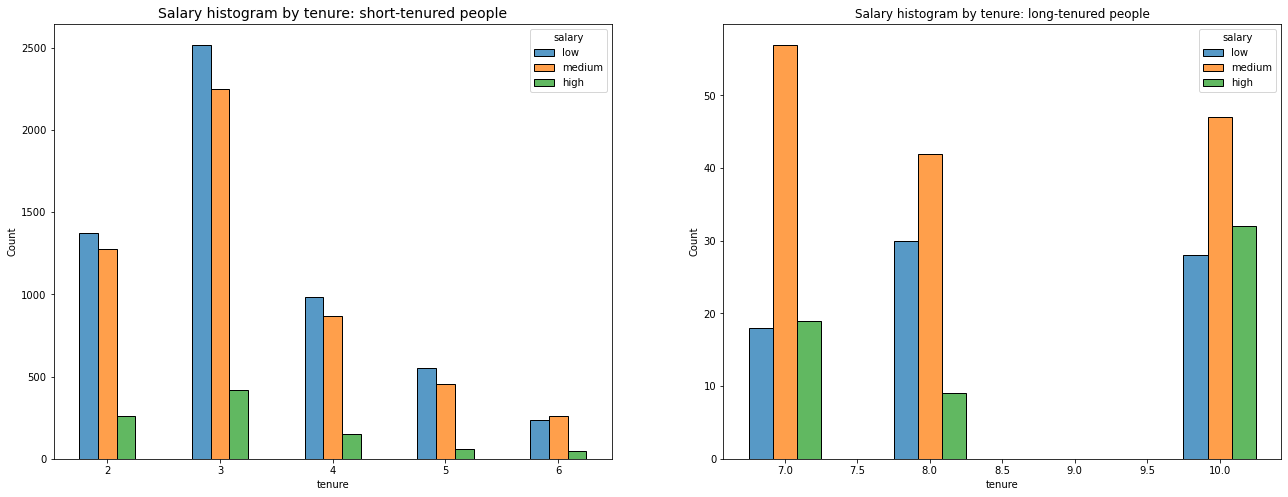

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

#Define short and long tenure
tenure_short = df1[df1['tenure'] < 7]
tenure_long = df1[df1['tenure'] > 6]

#Plot both
sns.histplot(data = tenure_short, x = 'tenure', hue = 'salary', discrete = 1,
            hue_order = ['low', 'medium', 'high'], multiple = 'dodge', shrink = .5, ax = ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize = '14')

sns.histplot(data = tenure_long, x = 'tenure', hue = 'salary', discrete = 1,
            hue_order = ['low', 'medium', 'high'], multiple = 'dodge', shrink = .5, ax = ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people');

Los gráficos de arriba muestran que los empleados con mayor duración no estan compuestos de manera desproporcionada por empleados con sueldos altos.

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

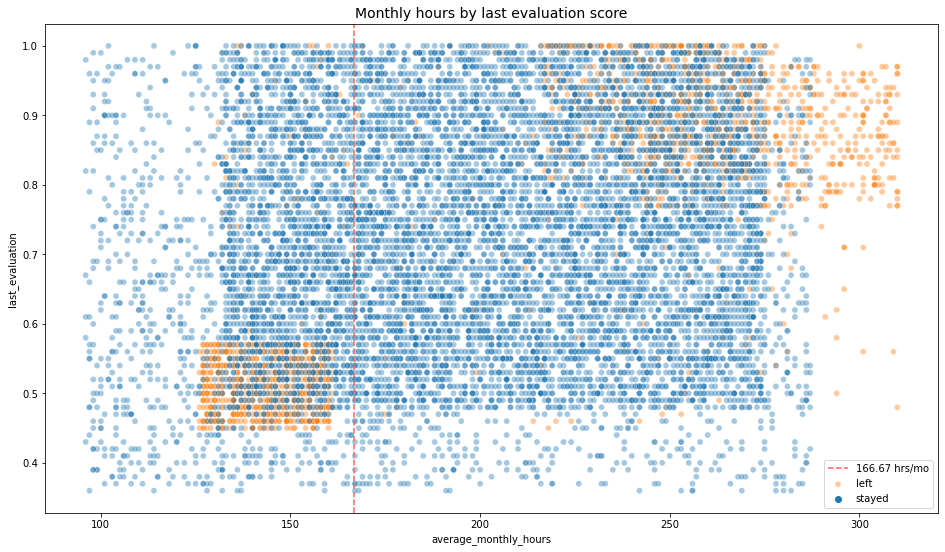

In [20]:
plt.figure(figsize =(16,9))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, color = '#ff6361', label = '166.67 hrs/mo', ls = '--')
plt.legend(labels=['166.67 hrs/mo', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize = 14);

El scatterplot muestra lo siguiente:

1. Hay dos claros grupos diferenciados de empleados que han abandonado la empresa. Un grupo son empleados que trabajaban entre 125 y 155 horas al mes, un poco por debajo de la media de 166.67. El otro grupo son trabajadores lo cuales trabajaban muchas horas.

2. Parece haber una correlación entre horas trabajadas y la nota de la evaluación.

3. No hay un gran porcentaje de empleados en el cuadrante izquierdo. Trabajar muchas horas no garantiza una evaluación elevada.

4. Muchos de los empleados trabajan bastante mas de 167 horas al mes

The scatterplot shows the following:

1. There are two clear distinct groups of employees who have left the company. One group are employees who worked between 125 and 155 hours per month, slightly below the average of 166.67. The other group are employees who worked long hours. The other group are workers who worked long hours.

2. There seems to be a correlation between hours worked and the evaluation score.

3. There is not a large percentage of employees in the left quadrant. Working long hours does not guarantee a high evaluation.

4. Many of the employees work considerably more than 167 hours per month.

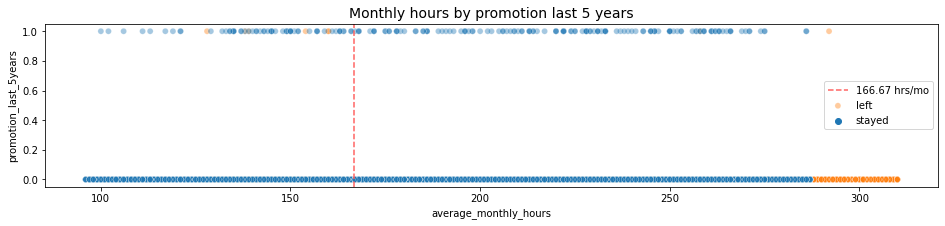

In [21]:
plt.figure(figsize = (16,3))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, color = '#ff6361', label = '166.67 hrs/mo', ls = '--')
plt.legend(labels=['166.67 hrs/mo', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize = 14);

Podemos recalcar lo siguiente del gráfico entre las horas mensuales y si han obtenido un ascenso:

1. Varios empleados que han sido ascendidos abandonaron la empresa. 

2. La mayoría de empleados que han sido ascendidos han trabajado más horas de las 167.

3. Todos los empleados que abandonaron estaban trabajando muchas horas sin obtener un ascenso.

We can highlight the following from the graph between monthly hours and whether they have been promoted:

1. Several employees who have been promoted left the company. 

2. The majority of employees who have been promoted have worked more hours than the 167.

3. All employees who left the company were working long hours without getting a promotion.

In [22]:
# Display counts for each department
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

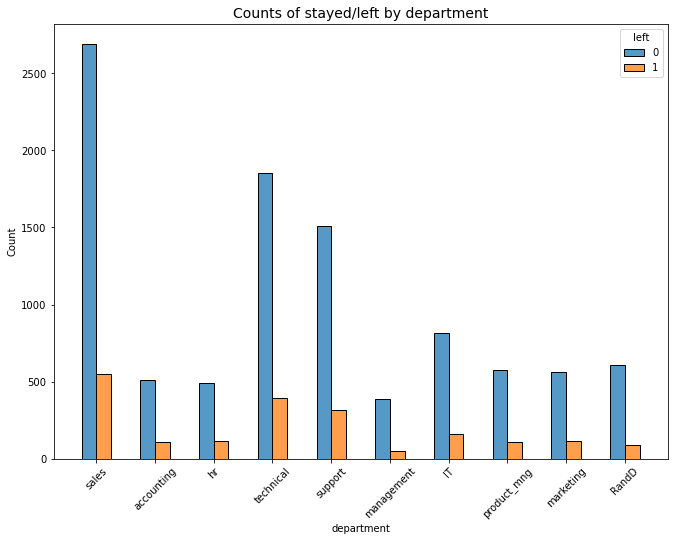

In [23]:
#Histogram to compare department distribution of employees who left to employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data = df1, x = 'department', hue = 'left', discrete = 1, hue_order = [0, 1], multiple = 'dodge', shrink = .5)
plt.xticks(rotation = '45')
plt.title('Counts of stayed/left by department', fontsize = 14);

No hay ningún departamento que difiera de manera significativa con el resto en su proporción de empleados que se han ido y los que se han quedado.

There is no department that differs significantly from the rest in its proportion of employees who have left and those who have stayed.

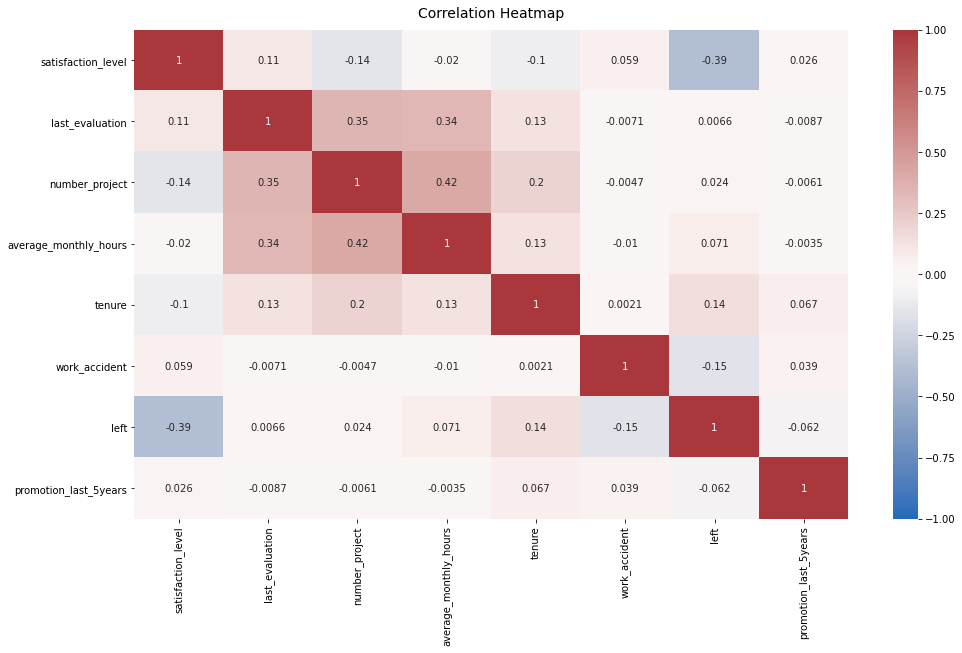

In [24]:
#Correlation heatmap
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df0.corr(), vmin = -1, vmax = 1, annot = True, cmap = sns.color_palette('vlag', as_cmap = True))
heatmap.set_title('Correlation Heatmap', fontdict ={'fontsize':14}, pad = 12);

El mapa de correlación confirma que el número de proyectos, horas mensuales y la evaluación tienen todos entre ellos correlación positiva, mientras que si un empleado se va o no tiene correlación negativa con el nivel de satisfacción.

The correlation heatmap confirms that the number of projects, the monthly hours and the evaluation score all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

Como la variable que queremos predecir es categórica, podemos construir dos tipos de modelos: modelo de Logistic Regression y un modelo de Machine Learning Tree-based.

Since the variable we want to predict is categorical, we can build two types of models: Logistic Regression model and Tree-based Machine Learning Model.

### Método de modelización A: Logistic Regression / Modeling Approach A: Logistic Regression Model 

In [25]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


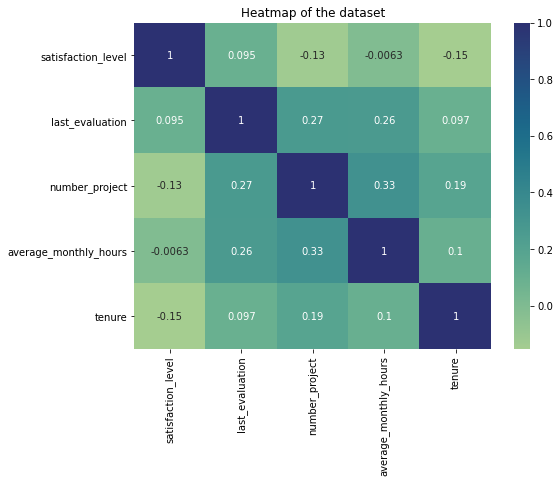

In [26]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

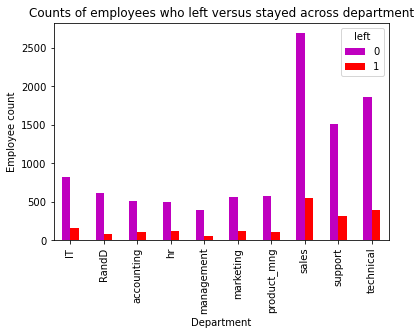

In [27]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Como la regresión logística es bastante sensible a los valores atípicos vamos a quitar dichos valores en la columna de `tenure`. Estos valores atípicos se han analizado con anterioridad.

Since the logistic regression is quite sensitive to outliers, it would be a good idea remove the outliers in the `tenure` column. These outliers were analized before.

In [28]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [30]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [32]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [33]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

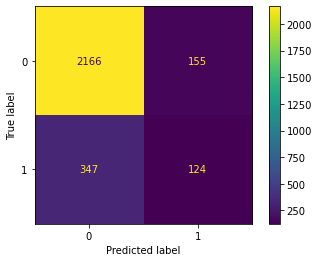

In [34]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

El cuadrante superior izquierdo muestra el número de negativos ciertos. El cuadrante superior derecho muestr el número de postivos falsos. El cuadrante inferior izquierdo muestra el número de falsos negativos. Por último el cuadrante inferior derecho muestra el número de positivos ciertos.

- Negativos ciertos: Número de personas que el modelo predijo que se quedaban y realmente se quedaron.
- Falsos positivos: Número de personas que el modelo predijo que se iban y realmente se quedaron.
- Falsos negativos: Número de personas que el modelo predijo que se quedaban y realmente se fueron.
- Positivos ciertos: Número de personas que el modelo predijo que se iban y realmente se fueron.

The upper left quadrant shows the number of true negatives. The upper right quadrant shows the number of false positives. The lower left quadrant shows the number of false negatives. Finally, the lower right quadrant shows the number of true positives.

- True negatives: Number of people who the model predicted would stay and actually did stay.
- False positives: Number of people who were predicted by the model to leave and actually stayed.
- False negative: Number of people who were predicted by the model to stay and actually left.
- True positives: Number of people who were predicted by the model to leave and actually left.

In [35]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

Hay aproximadamente un 83% de empleados que se quedan y un 17% que se van. 

There is an approximately 83%-17% split between the people who stayed and the people who left.

In [36]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



El modelo obtuvo una precisión del 79%, un recall del 82%, una puntuación f1 del 80% y una exactitud del 82%. Sin embargo, es más importante predecir los empleados que se van a ir, en este apartado el modelo obtuvo un valor bastante más bajo.

The model obtained a precision of 79%, a recall of 82%, an f1 score of 80% and an accuracy of 82%. However, it is more important to predict which employees will leave, where the model scored significantly lower.

### Método de modelización B: Tree-based Model / Modeling Approach A: Tree-based Model 

In [37]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [38]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Round 1

In [40]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [41]:
%%time
tree1.fit(X_train, y_train)

Wall time: 3.09 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'precision', 'recall', 'roc_auc'})

In [42]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [43]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

Vamos a construir un función que nos permita obtener los valores del modelo.

We are going to build a function who allows us to obtain the scores of the model.

In [44]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [45]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


Todos estos valores son fuertes indicadores de que el modelo tiene un buen rendimiento.

All of these scores from the decision tree model are good indicators of a good performance.

#### Feature Engineering

La primera ronda del árbol han incluido todas las variables. Esto puede provocar alguna fuga de datos. La fuga de datos es cuando usas datos para entrenar el modelo que no debería de ser usado durante el entrenamiento del modelo, ya sea porque aparece en los datos del test o porque son datos que tu no vas a tener cuando el modelo esté funcionando. 

En este caso es bastante probable que la empresa no tenga los niveles de satisfacción para todos los empleados. También es posible que la columna de horas mensuales sea un causante de fuga de datos pues los empleados que están pensando en irse de la empresa pueden reducir las horas que trabajan al mes. 

Ahora vamos a proceder eliminando la columna de nivel de satisfacción y creando una nueva columna que muestre cuando los empleados están trabajando demasiado. 



The first round of the tree has included all variables. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train the model that should not be used during the training, either because it appears in the test data or because it is data that you will not have when the model is actually deployed. 

In this case it is quite likely that the company does not have the satisfaction levels for all employees. It is also possible that the `average_monthly_hours` column is a cause of data leakage as employees who are thinking of leaving the company may reduce the hours they work per month. 

We will now proceed by removing the satisfaction level column and creating a new column that shows when employees are working too much. 

In [46]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [47]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 es aproximadamente el número de horas al mes que un trabajador debería de realizar en la empresa (suponiendo 8 horas al día, 5 días a la semana). Podemos definir estar trabajando demasiado a partir de las 175 horas.

166.67 is approximately the number of hours per month that a employee should work in the company (assuming 8 hours a day, 5 days a week). We can define overwork as 175 hours or more.

In [48]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [49]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [50]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [51]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Round 2

In [52]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [53]:
%%time
tree2.fit(X_train, y_train)

Wall time: 2.57 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'precision', 'recall', 'roc_auc'})

In [54]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [55]:
# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

In [56]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


Aunque hayamos quitado las variables antes mencionadas las valoraciones siguen siendo bastante buenas.

Even if we have removed the variables mentioned above, the ratings are still quite good.

#### Decision Tree

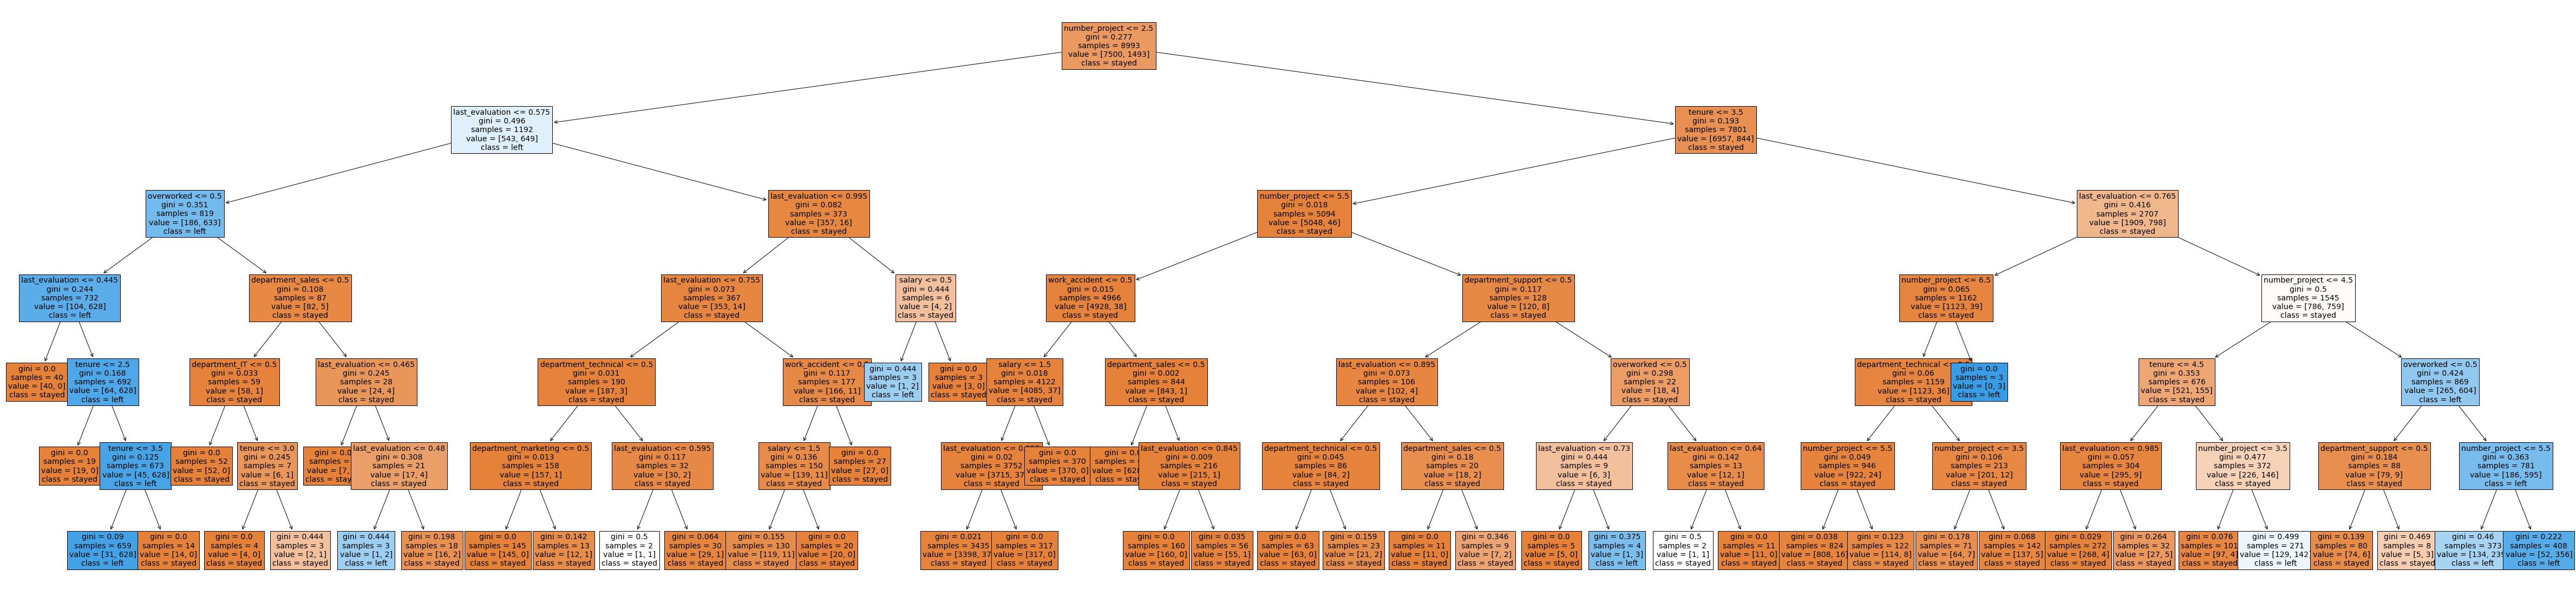

In [57]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Características importantes del árbol / Decision tree feature importance

In [58]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


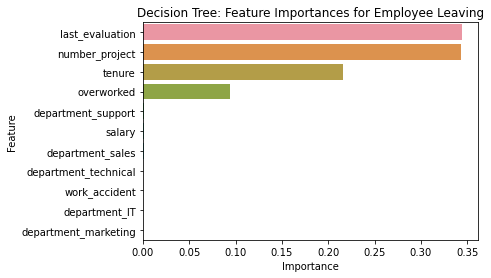

In [59]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

El gráfico de barras nos muestra que las características más importantes son `last_evaluation`, `number_project`, `tenure` y `overworked` en ese orden. Estas son las variables más importantes a la hora de predecir si un empleado se va a ir o no de la empresa.

The barplot shows that the most important features are `last_evaluation`, `number_project`, `tenure` and `overworked` in that order. These are the most important variables in predicting whether or not an employee will leave the company.

Puede estar justificado considerar que se sigue produciendo fuga de datos. Puede ser prudente considerar como cambian las predicciones cuando se elimina la columna de `last_evaluation`. Es posible que las evaluaciones se realicen con poca frecuencia, en cuyo caso sería útil predecir la retención de empleados sin tener en cuenta esta variable.

It may be justified to consider that data leakage is still occurring. It may be prudent to consider how predictions change when the `last_evaluation` column is removed. It is possible that evaluations are carried out infrequently, in which case it would be useful to predict employee retention without taking this variable into account.

## Recordatorio de las métricas: / Recall evalutaion metrics:

- **AUC** es el áre debajo de la curva de ROC; también se le considera la probabilidad de que el modelo clasifique mejor un ejemplo postivo aleatorio que un ejemplo negativo aleatorio.

- **Precision** mide la proporción de verdaderos positivos

- **Recall** mide la proporción de datos que se predicen como positivos de todos los datos que son realmente positivos

- **Accuracy** mide la proproción de datos clasificados correctamente.

- **F1-score** es la media armónica de la precisión y el recall.


- **AUC** is the area under the ROC curve; it is also considered the probability that the model classifies a random positive example better than a random negative example.

- **Precision** measures the proportion of true positives.

- **Recall** measures the proportion of data that are predicted to be positive out of all data that are true positives.

- **Accuracy** measures the proportion of data that are correctly classified.

- **F1-score** is the harmonic mean of the precision and recall.

## Conclusiones / Conclusion

Del modelo se extrae que claramente los empleados de la empresa trabajan en exceso. Parece que los empleados abandonan la empresa como consecuencia de la mala gestión. El abandono está ligado a jornadas laborales más largas, muchos proyectos y, en general, niveles de satisfacción más bajos. Hay un grupo considerable de empleados de la empresa que posiblemente estan quemados. También parece que si un empleado lleva más de 6 años en la empresa tiende a quedarse. Las recomendaciones serían las siguientes:

- Limitar el número de proyectos en los que un empleado puede trabajar.

- Considerar el ascender a los empleados que llevan 4 años trabajando o realizar una investigación del porqué los empleados que llevan esa cantidad de años trabajando están tan descontentos.

- Recompensar empleados por trabajar durante muchas horas o no exigir que lo hagan.

- Si los empleados no estan familiarizados con la empresa dejarles claro la carga de trabajo que hay en la empresa. Una vez informados ellos deberán decidir si es acorde con sus expectativas.

- Las puntuaciones altas no deberían reservarse a los empleados que más horas trabajan. Se debería de hace una escala proporcional para recompensar a los empleados que contribuyen mñas/se esfuerzan más.

It is clear from the model that the company's employees are clearly overworked. Employees seem to leave the company as a result of poor management. Leaving is linked to longer working hours, many projects and generally lower levels of satisfaction. There is a sizeable group of employees in the company who are possibly burnt out. It also appears that if an employee has been with the company for more than 6 years they tend to stay. Recommendations would be as follows:

- Limit the number of projects an employee can work on.

- Consider promoting employees who have been working for 4 years or conduct an investigation into why employees who have been working for that number of years are so dissatisfied.

- Reward employees for working long hours or do not require them to do so.

- If employees are not familiar with the company, make it clear to them what the workload is in the company. Once they are informed, they should decide whether it is in line with their expectations.

- High marks should not be reserved for the employees who work the longest hours. A proportional scale should be made to reward employees who contribute the most/work the hardest.


